In [1]:
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker

import pandas as pd
import numpy as np
import sys
import os

sys.path.insert(0, "..")
from global_config import config

results_dir   = config.get_property('results_dir')
data_dir      = config.get_property('data_dir')

In [3]:
usa_df          = pd.read_csv(os.path.join(data_dir, 'processed_data_us.csv'))
dates_forecasts = usa_df.date[11:].values

path_to_frcst_1 = os.path.join(results_dir, "forecast", "eakf_model1")
path_to_frcst_2 = os.path.join(results_dir, "forecast", "eakf_model2")
path_to_frcst_3 = os.path.join(results_dir, "forecast", "eakf_model3")

path_no_pop_dyn = [path_to_frcst_1, path_to_frcst_2, path_to_frcst_3]

path_to_frcst_1 = os.path.join(results_dir, "forecast", "BD_eakf_model1")
path_to_frcst_2 = os.path.join(results_dir, "forecast", "BD_eakf_model2")
path_to_frcst_3 = os.path.join(results_dir, "forecast", "BD_eakf_model3")

path_pop_dyn     = [path_to_frcst_1, path_to_frcst_2, path_to_frcst_3]


In [33]:
scores_bd_df = pd.read_csv(os.path.join(results_dir, "forecast", "evaluation", "BD_scores.csv"), parse_dates=["frsct_date"])
scores_df    = pd.read_csv(os.path.join(results_dir, "forecast", "evaluation", "scores.csv"), parse_dates=["frsct_date"])

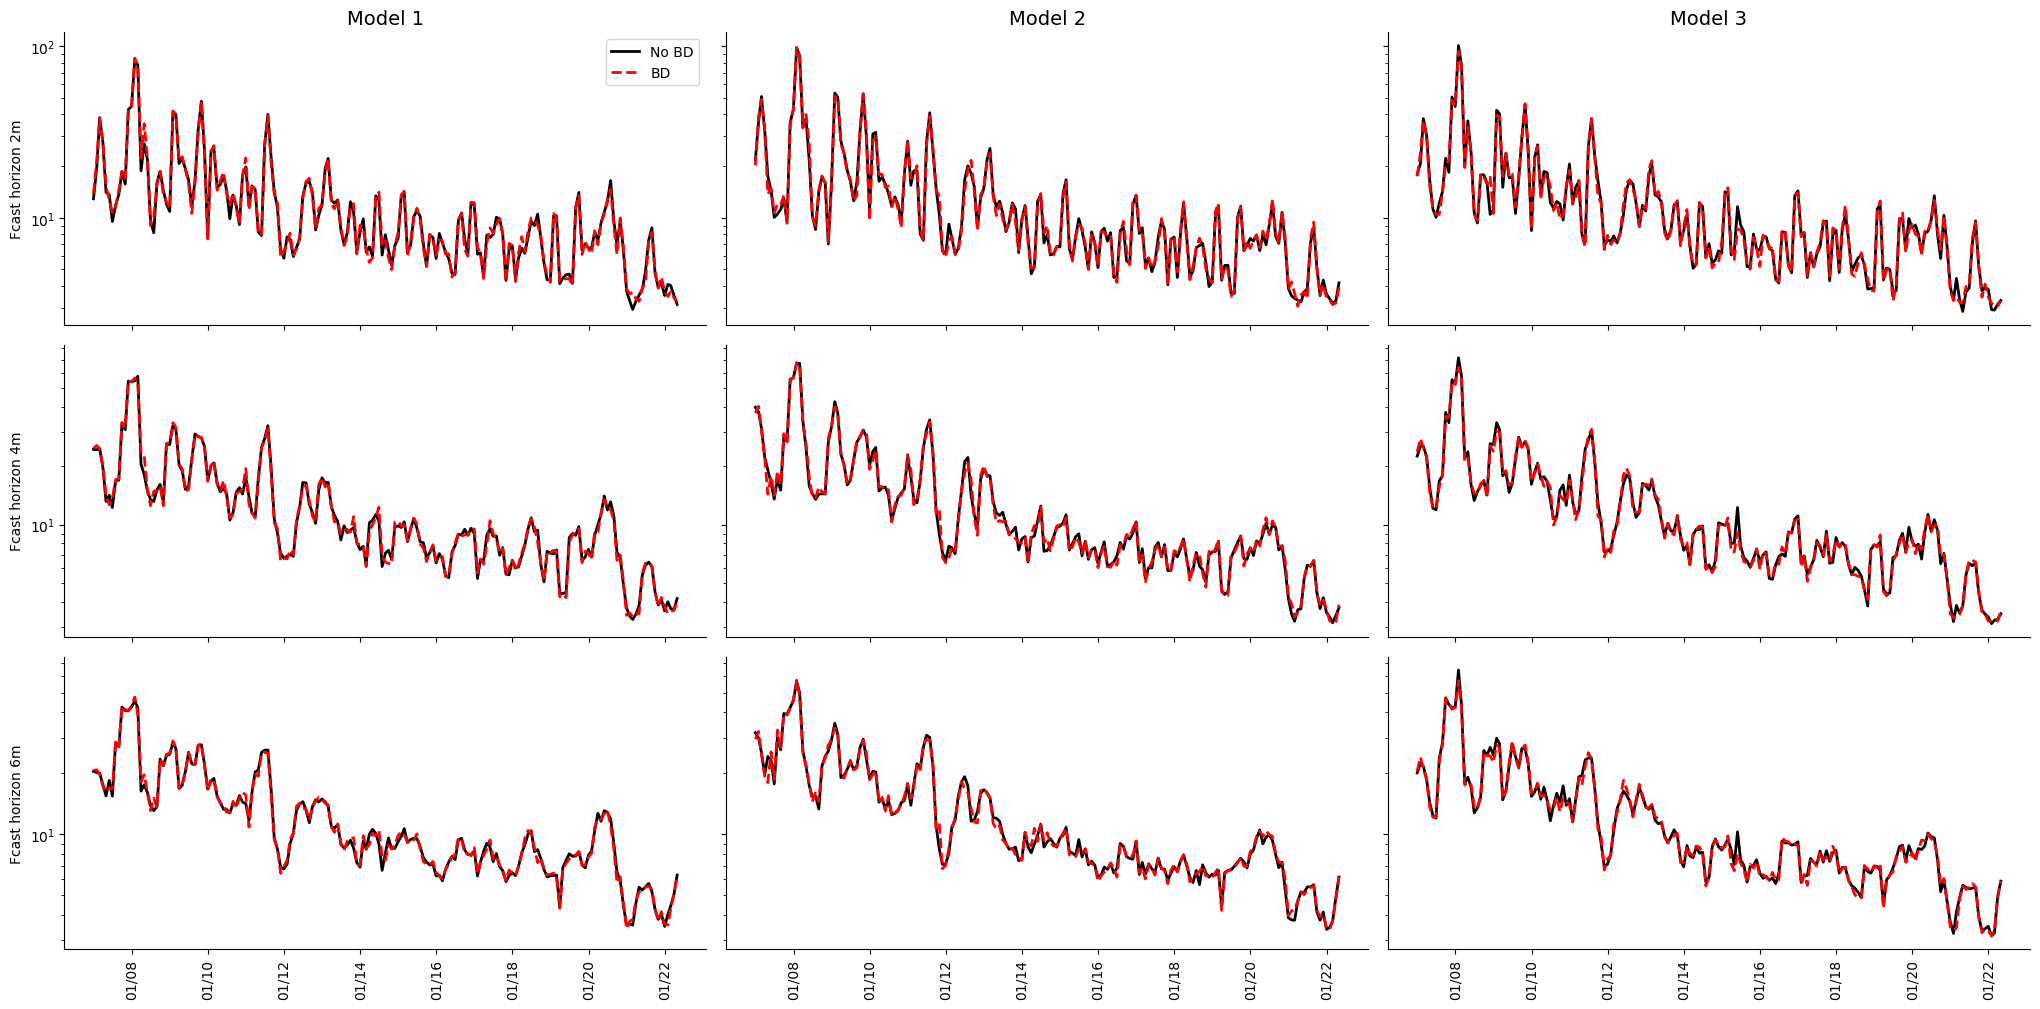

In [65]:
scores_use     = "wis"
eval_horizons  = ['2m', '4m',  '6m']
models_compare = ['eakf_model1', 'eakf_model2', 'eakf_model3']

fig, ax = plt.subplots(3, 3, figsize=(20.5, 10.2), sharex=True, sharey="row")

for i_hor, f_hor in enumerate(eval_horizons):
    for i_mod, model_compare in enumerate(models_compare):

        bf_sc_df = scores_bd_df.query(f"method == '{model_compare}' & eval_horizon == '{f_hor}'").drop(columns=['mae', 'error'])
        sc_df    = scores_df.query(f"method == '{model_compare}' & eval_horizon == '{f_hor}'").drop(columns=['mae', 'error'])

        ax[i_hor, i_mod].plot(sc_df.frsct_date, sc_df.wis, ls='-', c="k", lw=2, label="No BD")
        ax[i_hor, i_mod].plot(bf_sc_df.frsct_date, bf_sc_df.wis, ls='--', c="r", lw=2, label="BD")

        ax[i_hor, i_mod].set_yscale("log")
        ax[i_hor, i_mod].spines['right'].set_visible(False)
        ax[i_hor, i_mod].spines['top'].set_visible(False)


for i in range(3):

    ax[0, i].set_title(f"Model {i+1}", fontsize=14)

    ax[i, 0].set_ylabel(f"Fcast horizon {eval_horizons[i]}")

    ax[-1, i].xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
    ax[-1, i].tick_params(which='both', axis='x', labelrotation=90)

    ax[-1, i].spines['right'].set_visible(False)
    ax[-1, i].spines['top'].set_visible(False)

ax[0, 0].legend(loc="upper right")

plt.tight_layout()

fig.savefig(os.path.join(results_dir, "figures", "reviews", f"PopDynVsNonPop.png"), dpi=300, transparent=True)

